# 실습1 : Naver Menu들에서 '메일'텍스트 추출

In [10]:
import requests as req
from bs4 import BeautifulSoup as bs

In [7]:
# request : 브라우저를 사용자가 켜는 것과 같음
res = req.get('https://www.naver.com')
res

<Response [200]>

'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버
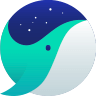
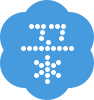

In [8]:
res.text

### BeatifulSoup으로 객체화 진행

<!DOCTYPE html>
<html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"/> <meta content="index,nofollow" name="robots"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"/> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"/> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:
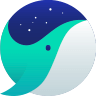
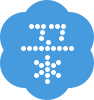

In [11]:
soup = bs(res.text, 'lxml')
soup

### f12(개발자 모드)로 요소들을 확인해보기
#### CSS Selector는 어떤것이 있을까?
1. tag selector('태그이름') -> google, youtube실습 때 사용
2. id selector(#)
3. class selector(.) -> 네이버 메일실습 때 사용
4. child selector(>)
5. parent selector(&)
6. adfacent selector(+)
7. general sibling select(~)

In [12]:
# 메뉴들을 뽑기 -> select함수 사용
# a(tag이름)과 nav(class이름)이 주어짐
naver_menus = soup.select('a.nav')
naver_menus

[<a class="nav" data-clk="svc.mail" href="https://mail.naver.com/"><i class="ico_mail"></i>메일</a>,
 <a class="nav" data-clk="svc.cafe" href="https://section.cafe.naver.com/">카페</a>,
 <a class="nav" data-clk="svc.blog" href="https://section.blog.naver.com/">블로그</a>,
 <a class="nav" data-clk="svc.kin" href="https://kin.naver.com/">지식iN</a>,
 <a class="nav shop" data-clk="svc.shopping" href="https://shopping.naver.com/"><span class="blind">쇼핑</span></a>,
 <a class="nav shoplive" data-clk="svc.shoppinglive" href="https://shoppinglive.naver.com/home"><span class="blind">쇼핑LIVE</span></a>,
 <a class="nav" data-clk="svc.pay" href="https://order.pay.naver.com/home">Pay</a>,
 <a class="nav" data-clk="svc.tvcast" href="https://tv.naver.com/"><i class="ico_tv"></i>TV</a>,
 <a class="nav" data-clk="svc.dic" href="https://dict.naver.com/">사전</a>,
 <a class="nav" data-clk="svc.news" href="https://news.naver.com/">뉴스</a>,
 <a class="nav" data-clk="svc.stock" href="https://finance.naver.com/">증권</a>,


In [32]:
# 인덱싱으로 '메일요소' 뽑기
naver_menus[0].text

'메일'

In [34]:
# for loop으로 메뉴들 추출
len(naver_menus) # 총 메뉴가 몇 개 뽑혔는 지 확인

for i in range(len(naver_menus)):
    print(naver_menus[i].text)

메일
카페
블로그
지식iN
쇼핑
쇼핑LIVE
Pay
TV
사전
뉴스
증권
부동산
지도
VIBE
도서
웹툰


# 실습2 : Naver 날씨에서 온도 데이터 수집

In [35]:
res_weather = req.get('https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%EC%98%A4%EB%8A%98%EC%9D%98+%EB%82%A0%EC%94%A8')
res_weather

<Response [200]>

In [41]:
# 객체화
soup = bs(res_weather.text, 'lxml')
soup

<!DOCTYPE html>
<html lang="ko"><head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="오늘의 날씨 : 네이버 통합검색" property="og:title"/> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'오늘의 날씨'의 네이버 통합검색 결과입니다." property="og:description"/> <meta content="'오늘의 날씨'의 네이버 통합검색 결과입니다." lang="ko" name="description"/> <title>오늘의 날씨 : 네이버 통합검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"/><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_230427.css" rel="stylesheet" type="text/css"/> <link href="https://ssl.pstatic

In [39]:
temperature = soup.select('div.temperature_text > strong')
temperature[0]

<strong><span class="blind">현재 온도</span>17.4<span class="celsius">°</span></strong>

In [47]:
# 원하는 데이터가 하나? -> select_one함수 사용해도 무방
temperature = soup.select_one('div.temperature_text > strong')
temperature

<strong><span class="blind">현재 온도</span>17.4<span class="celsius">°</span></strong>

# 실습3 : Naver News 기사제목 가져오기
- 우리가 같은 네이버 서비스를 이용하고 있지만, 컴퓨터 모름
- Naver News 페이지를 새로 요청(res. 다시 객체화)
- select, select_one 함수로 태그 위치 지정
- 출력

In [50]:
# 1. 요청/응답받기
url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EB%9F%AC%EC%8B%9C%EC%95%84+%EC%9A%B0%ED%81%AC%EB%9D%BC%EC%9D%B4%EB%82%98+%EC%A0%84%EC%9F%81'
res_news = req.get(url)

In [51]:
# 2. beautifulsoup 객체화 진행
soup_news = bs(res_news.text, 'lxml')
soup_news

<!DOCTYPE html>
<html lang="ko"><head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="러시아 우크라이나 전쟁 : 네이버 뉴스검색" property="og:title"/> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'러시아 우크라이나 전쟁'의 네이버 뉴스검색 결과입니다." property="og:description"/> <meta content="'러시아 우크라이나 전쟁'의 네이버 뉴스검색 결과입니다." lang="ko" name="description"/> <title>러시아 우크라이나 전쟁 : 네이버 뉴스검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"/><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_230427.css" rel="stylesheet" type="text/css"/> <link h

In [52]:
article = soup_news.select_one('a.news_tit')
article.text

'KT, 러시아 IDC 법인 1년만에 철수… 우크라이나 전쟁 여파'

### 기사'들'을  뽑아오기
- select 함수로
- for 문(for loop)을 이용해서 추출

In [54]:
articles = soup_news.select('a.news_tit')
articles[0].text

'KT, 러시아 IDC 법인 1년만에 철수… 우크라이나 전쟁 여파'

In [55]:
for i in range(len(articles)):
    print(articles[i].text)

KT, 러시아 IDC 법인 1년만에 철수… 우크라이나 전쟁 여파
교황 "우크라 전쟁 종식 위한 비밀 임무 수행 중"
우크라전 장기화에… 2023년 1분기 러시아인 난민 신청 건수 1위
유엔식량농업기구 "러-우 전쟁, 세계 식량안보에 파괴적인 영향"
“북한, 러시아 용병 회사에 포탄 1만발 제공 예정”
우크라 대반격 임박...러시아 대규모 방어망 구축
KT, 러시아 IDC법인 철수…"우크라이나 전쟁 탓"
시진핑은 왜 우크라이나 젤렌스키와 통화했을까
러시아, 유류시설 공격 인정…"봄철 대반격의 서막"
[단독] 현대차, '脫 러시아' 계획 수립…현대모비스·위아는 '부품 공급' 유지...


# 개인 실습
1. 네이버 창 -> 원하는 키워드 검색
2. 뉴스 탭으로 이동
3. beatifulsoup으로 요소들을 뽑아보고 그 중 마음에 드는 기사 하나를 추출

In [57]:
res_park = req.get('https://search.naver.com/search.naver?sm=tab_sug.top&where=news&query=%EC%A3%BC%EC%B0%A8&oquery=%EC%BA%A0%ED%95%91&tqi=iZ8Wdsp0YiRssCfxPtVssssss2d-270145&acq=%EC%A3%BC%EC%B0%A8&acr=2&qdt=0')
res_park

<Response [200]>

In [58]:
soup_park = bs(res_park.text, 'lxml')
soup_park

<!DOCTYPE html>
<html lang="ko"><head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="주차 : 네이버 뉴스검색" property="og:title"/> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'주차'의 네이버 뉴스검색 결과입니다." property="og:description"/> <meta content="'주차'의 네이버 뉴스검색 결과입니다." lang="ko" name="description"/> <title>주차 : 네이버 뉴스검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"/><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_230427.css" rel="stylesheet" type="text/css"/> <link href="https://ssl.pstatic.net/sstatic/sea

In [63]:
articles = soup_park.select('a.news_tit')
for i in range(len(articles)):
    print(articles[i].text)

청주시, '자율주행차 주차 시범사업' 공모 선정
부산 아파트 지하주차장서 충전하던 전기차 불…차량 6대 파손
무거워진 전기차 ‘비싼 청구서’, 도로파손에 주차장 붕괴 위험
인천 아파트 건설현장서 지하주차장 구역 ‘와르르’, 왜
인천 검단신도시 아파트 건설현장 지하주차장 지붕 붕괴
아파트 주차장 전기차에서 불…지하철 등에서도 화재 잇따라
주차 시간 확인하고 결제까지 척척…티맵 발레파킹 정조준
"여수 웅천생숙 위한 주차장 조례개정, 핀셋특혜"…시민연대 반대
부산 범천동 아파트 주차장서 불…"전기차 발화"
주차된 전기차에서 불...주변 차량 5대도 피해


In [65]:
articles[1].text

'부산 아파트 지하주차장서 충전하던 전기차 불…차량 6대 파손'